<a href="https://colab.research.google.com/github/mohmaed7777/DNA-Cluster/blob/main/Gemonic_Clustering_with_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()
print('setup done!')

setup done!


In [3]:
df = pd.read_csv('/content/codon_usage.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,CCA,CCG,UGG,GGU,GGC,GGA,GGG,UCU,UCC,UCA,UCG,AGU,AGC,ACU,ACC,ACA,ACG,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752,0.02506,0.01103,0.04110,0.00902,0.03308,0.01003,0.05013,0.01554,0.01103,0.02356,0.03208,0.01203,0.00501,0.01003,0.01203,0.03158,0.01905,0.02456,0.01353,0.02155,0.00251,0.00652,0.00150,0.01554,0.00501,0.02105,0.00902,0.01053,0.00501,0.02256,0.00301,0.03108,0.00401,0.02607,0.00251,0.01153,0.00501,0.02356,0.01053,0.03860,0.00401,0.00702,0.00401,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882,0.03324,0.00814,0.04071,0.00814,0.03256,0.01085,0.04885,0.01221,0.01357,0.00678,0.02714,0.01221,0.00407,0.01425,0.01221,0.01967,0.02239,0.01289,0.02103,0.01493,0.00407,0.00475,0.00068,0.02035,0.00950,0.02782,0.01425,0.00611,0.00475,0.02917,0.00407,0.02374,0.00882,0.02917,0.00271,0.01628,0.00204,0.01967,0.00543,0.03392,0.00136,0.00678,0.00136,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316,0.02180,0.01625,0.01872,0.01213,0.01070,0.02406,0.01234,0.01440,0.00514,0.01604,0.01460,0.02098,0.01070,0.01728,0.01851,0.00864,0.01172,0.01892,0.01933,0.01419,0.01296,0.00967,0.01337,0.01337,0.01851,0.01131,0.01419,0.01090,0.02612,0.01275,0.01522,0.02365,0.02962,0.01789,0.01625,0.01234,0.01604,0.01687,0.02077,0.03949,0.00864,0.00596,0.00926,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507,0.02924,0.02089,0.02141,0.01723,0.01932,0.02141,0.00679,0.02245,0.00522,0.01358,0.00418,0.01410,0.00574,0.01201,0.00992,0.00366,0.02402,0.02663,0.02872,0.00992,0.02350,0.00522,0.01619,0.00836,0.02037,0.01358,0.02089,0.00731,0.02141,0.00888,0.01567,0.01253,0.02298,0.01358,0.00992,0.00888,0.00783,0.00679,0.03133,0.04282,0.00627,0.00261,0.00261,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310,0.02773,0.02803,0.00508,0.00920,0.02965,0.02878,0.00574,0.01572,0.01577,0.01007,0.00508,0.00604,0.00679,0.01205,0.03127,0.00775,0.00959,0.00797,0.02006,0.00359,0.00933,0.01191,0.01616,0.00788,0.02593,0.00854,0.01200,0.02098,0.02089,0.01367,0.01502,0.01809,0.02738,0.01796,0.01082,0.00705,0.01174,0.00858,0.03408,0.03964,0.00950,0.00429,0.00578,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [7]:
df.shape

(9697, 69)

In [4]:
df.nunique()

Kingdom           7
DNAtype          11
SpeciesID      9300
Ncodons        6142
SpeciesName    9685
               ... 
GAA            4479
GAG            4140
UAA             579
UAG             360
UGA             831
Length: 69, dtype: int64

In [5]:
df.isnull().sum()

Kingdom        0
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
              ..
GAA            1
GAG            1
UAA            1
UAG            1
UGA            1
Length: 69, dtype: int64

In [6]:
df.dtypes

Kingdom         object
DNAtype          int64
SpeciesID        int64
Ncodons          int64
SpeciesName     object
                ...   
GAA            float64
GAG            float64
UAA            float64
UAG            float64
UGA            float64
Length: 69, dtype: object

In [8]:
df.dropna(axis=1, inplace=True)

In [9]:
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310


In [10]:
df.DNAtype.describe()

count    9697.000000
mean        0.244302
std         0.704348
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: DNAtype, dtype: float64

In [11]:
df.drop(['SpeciesID', 'SpeciesName'], axis=1, inplace=True)

In [12]:
df.head()

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA
0,vrl,0,1995,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752
1,vrl,0,1474,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882
2,vrl,0,4862,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316
3,vrl,0,1915,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507
4,vrl,0,22831,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310


In [13]:
 df.describe(include='object')

,Kingdom,UUU,UUC
count,9697,9697,9697
unique,7,5174,4191
top,bct,0,0.02564
freq,2920,69,42


In [14]:
df.drop(['UUU', 'UUC'], axis=1, inplace=True)

In [15]:
df.head()

,Kingdom,DNAtype,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA
0,vrl,0,1995,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752
1,vrl,0,1474,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882
2,vrl,0,4862,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316
3,vrl,0,1915,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507
4,vrl,0,22831,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310


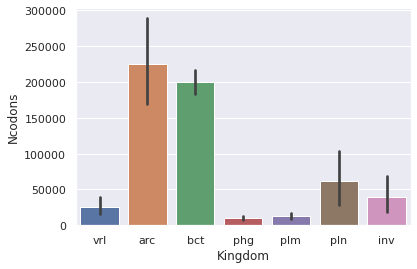

In [16]:
sns.barplot(x=df['Kingdom'], y=df['Ncodons'])

In [18]:
df.columns

Index(['Kingdom', 'DNAtype', 'Ncodons', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA',
       'CUG', 'AUU', 'AUC', 'AUA'],
      dtype='object')

In [20]:
data = df.drop(['DNAtype', 'UUA', 'UUG','CUU','CUC','CUA','CUG','AUU', 'AUC', 'AUA'],axis=1)
data.head()

,Kingdom,Ncodons
0,vrl,1995
1,vrl,1474
2,vrl,4862
3,vrl,1915
4,vrl,22831


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

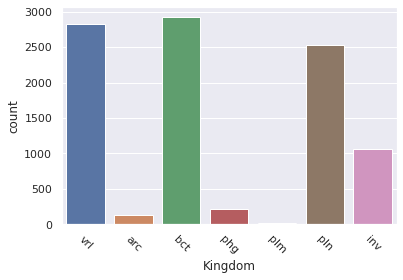

In [22]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Kingdom', data=data)
 
# Rotate x-labels
plt.xticks(rotation=-45)

#**Declare feature vector and target variable:-**

In [25]:
X = df
y = df['Kingdom']

#**Convert categorical variable into integers:-**

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Kingdom'] = le.fit_transform(X['Kingdom'])
y = le.transform(y)

In [27]:
X.head()

,Kingdom,DNAtype,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA
0,6,0,1995,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752
1,6,0,1474,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882
2,6,0,4862,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316
3,6,0,1915,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507
4,6,0,22831,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310


In [75]:
df.DNAtype.value_counts()

0     8340
2      816
1      496
4       31
12       4
5        2
11       2
3        2
9        2
7        1
6        1
Name: DNAtype, dtype: int64

#**Features Scaling:-**

In [28]:
cols = X.columns

In [29]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [30]:
X = pd.DataFrame(X, columns=[cols])

In [31]:
X.head()

,Kingdom,DNAtype,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA
0,1.0,0.0,0.000029,0.003526,0.034687,0.146743,0.333264,0.009473,0.373475,0.035765,0.261136,0.055952
1,1.0,0.0,0.000014,0.004795,0.067003,0.049646,0.295969,0.019326,0.410729,0.074841,0.326908,0.065625
2,1.0,0.0,0.000113,0.095691,0.152485,0.095389,0.115417,0.097385,0.111111,0.148189,0.208909,0.097917
3,1.0,0.0,0.000027,0.114167,0.098033,0.191144,0.141076,0.089049,0.160473,0.155913,0.292394,0.186533
4,1.0,0.0,0.000640,0.054086,0.363573,0.168334,0.056929,0.044809,0.193350,0.176295,0.112920,0.097470


#**Kmeans model with K=2:-**

In [32]:
from sklearn.cluster import KMeans

In [33]:
K_model = KMeans(n_clusters=2, random_state=0)
K_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#**K-Means model parameters study:-**

In [34]:
K_model.cluster_centers_

array([[0.92062163, 0.02987158, 0.00120415, 0.1324122 , 0.18013547,
        0.21345578, 0.14240049, 0.1004989 , 0.12799828, 0.16784049,
        0.23733898, 0.11907332],
       [0.2195498 , 0.00853762, 0.00440664, 0.14702249, 0.14128705,
        0.16715342, 0.15273399, 0.06750651, 0.23327873, 0.17625759,
        0.30305176, 0.10143229]])

In [35]:
K_model.inertia_

1237.797956043242

In [36]:
labels = K_model.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 2920 out of 9697 samples were correctly labeled.


In [37]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.30


#**Use elbow method to find optimal number of clusters:-**

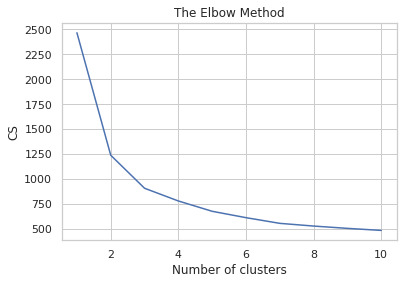

In [62]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    K_model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    K_model.fit(X)
    cs.append(K_model.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [39]:
pred = K_model.predict(X)

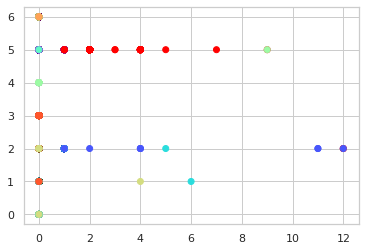

In [79]:
data_with_clusters = df.copy()
data_with_clusters['clusters'] = pred
plt.scatter(data_with_clusters['DNAtype'], data_with_clusters['Kingdom'], c=data_with_clusters['clusters'], cmap='rainbow')

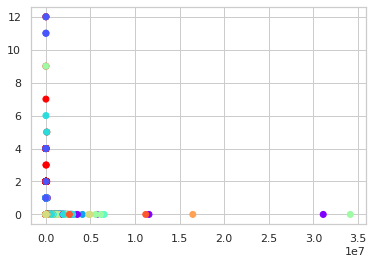

In [80]:
data_with_clusters = df.copy()
data_with_clusters['clusters'] = pred
plt.scatter(data_with_clusters['Ncodons'], data_with_clusters['DNAtype'], c=data_with_clusters['clusters'], cmap='rainbow')

#**KMeans Model with K=6:-**

In [42]:
K_model = KMeans(n_clusters=6, random_state=0)
# Fit the model: 
K_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [43]:
# Get the Cetretoides : 
K_model.cluster_centers_

array([[ 9.65235174e-01,  5.11247444e-04,  1.27421652e-03,
         1.16423383e-01,  1.88343814e-01,  2.04999831e-01,
         1.16369535e-01,  1.03749522e-01,  1.15006534e-01,
         1.58586240e-01,  2.00029990e-01,  1.28478004e-01],
       [ 2.30316742e-01,  3.65761689e-03,  3.61086699e-03,
         1.81388774e-01,  1.68547050e-01,  2.11907495e-01,
         8.86445364e-02,  9.15235529e-02,  1.04489655e-01,
         2.16614377e-01,  2.26306342e-01,  1.18618664e-01],
       [ 8.88081395e-01,  1.69573643e-03,  1.71832876e-03,
         3.18529296e-02,  1.36137522e-01,  1.82189927e-01,
         2.66924019e-01,  6.27906013e-02,  2.07840647e-01,
         1.01395013e-01,  3.55898024e-01,  4.80972712e-02],
       [ 1.89913761e-01, -3.85108612e-16,  6.01584633e-03,
         1.87486481e-02,  1.04446680e-01,  1.04054090e-01,
         2.55080506e-01,  2.57674960e-02,  4.33139592e-01,
         7.00641884e-02,  4.28966917e-01,  2.61280816e-02],
       [ 3.70322019e-01,  8.55091384e-02,  1.0091002

In [44]:
# Get the Inertia: 
K_model.inertia_

611.6012983981462

In [45]:
labels = K_model.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 2394 out of 9697 samples were correctly labeled.


In [46]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.25


In [47]:
new_pred = K_model.predict(X)

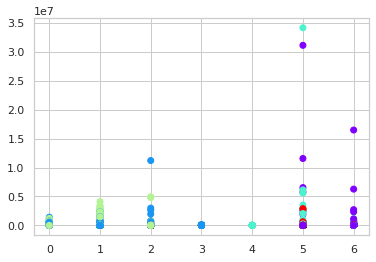

In [48]:
data_with_clusters = df.copy()
data_with_clusters['clusters'] = new_pred
plt.scatter(data_with_clusters['Kingdom'], data_with_clusters['Ncodons'], c=data_with_clusters['clusters'], cmap='rainbow')

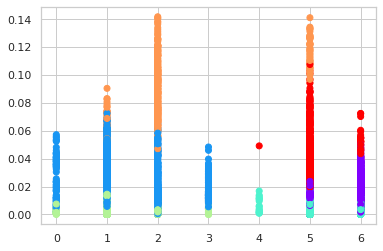

In [49]:
data_with_clusters = df.copy()
data_with_clusters['clusters'] = new_pred
plt.scatter(data_with_clusters['Kingdom'], data_with_clusters['UUA'], c=data_with_clusters['clusters'], cmap='rainbow')

In [52]:
K_model = KMeans(n_clusters=50, random_state=0)
# Fit the model: 
K_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [53]:
K_model.inertia_

251.53499863816285

In [54]:
labels = K_model.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 196 out of 9697 samples were correctly labeled.


In [55]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.02


In [56]:
predictions = K_model.predict(X)

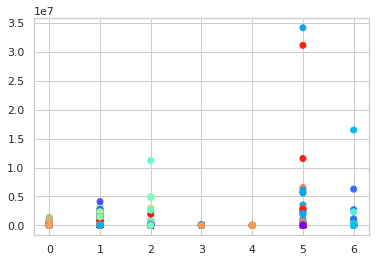

In [57]:
data_with_clusters = df.copy()
data_with_clusters['clusters'] = predictions
plt.scatter(data_with_clusters['Kingdom'], data_with_clusters['Ncodons'], c=data_with_clusters['clusters'], cmap='rainbow')

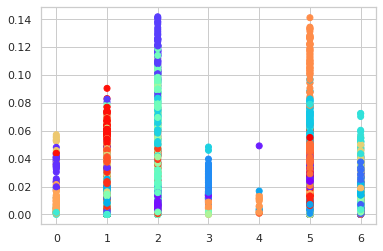

In [58]:
data_with_clusters = df.copy()
data_with_clusters['clusters'] = predictions
plt.scatter(data_with_clusters['Kingdom'], data_with_clusters['UUA'], c=data_with_clusters['clusters'], cmap='rainbow')

In [63]:
K_model = KMeans(n_clusters=100, random_state=0)
# Fit the model: 
K_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [64]:
K_model.inertia_

188.96901651386713

In [65]:
labels = K_model.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 184 out of 9697 samples were correctly labeled.


In [66]:
preds = K_model.predict(X)

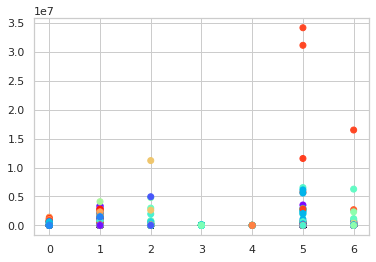

In [68]:
data_with_clusters = df.copy()
data_with_clusters['clusters'] = preds
plt.scatter(data_with_clusters['Kingdom'], data_with_clusters['Ncodons'], c=data_with_clusters['clusters'], cmap='rainbow')

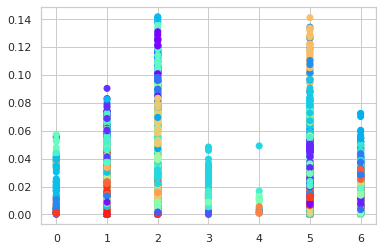

In [69]:
data_with_clusters = df.copy()
data_with_clusters['clusters'] = preds
plt.scatter(data_with_clusters['Kingdom'], data_with_clusters['UUA'], c=data_with_clusters['clusters'], cmap='rainbow')